In [2]:
import tensorflow as tf
import numpy as np                      
import pandas as pd                     
import matplotlib.pyplot as plt         
import seaborn as sns   

# Data Preprocessing

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 5s 0us/step


In [5]:
X_train.shape , X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
y_train.shape , y_test.shape

((60000,), (10000,))

In [7]:
X_train.min() , X_test.max()

(0, 255)

In [8]:
y_train.min() , y_test.max()

(0, 9)

In [9]:
#Normalize
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train.min() , X_test.max()

(0.0, 1.0)

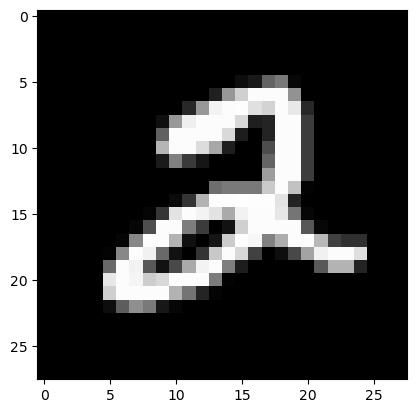

In [12]:
plt.imshow(X_train[5], cmap = "gray")

In [13]:
y_train[5]

2

# Build Model

In [19]:
model = tf.keras.models.Sequential()

In [25]:
model.add (tf.keras.layers.LSTM (units = 128, activation="relu", return_sequences = True, input_shape = (28,28)))
model.add (tf.keras.layers.Dropout(0.2))
model.add (tf.keras.layers.LSTM (units = 128, activation="relu"))
model.add (tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units = 32 , activation="relu"))
model.add (tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units = 10 , activation="softmax"))          

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 28, 128)           80384     
                                                                 
 dropout (Dropout)           (None, 28, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [29]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.001) 
model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Train Model

In [30]:
history = model.fit (X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 109s 57ms/step - loss: 0.5426 - accuracy: 0.8242 - val_loss: 0.1387 - val_accuracy: 0.9532
Epoch 2/10
1875/1875 [==============================] - 105s 56ms/step - loss: 0.1545 - accuracy: 0.9596 - val_loss: 0.0964 - val_accuracy: 0.9726
Epoch 3/10
1875/1875 [==============================] - 101s 54ms/step - loss: 0.1130 - accuracy: 0.9711 - val_loss: 0.0731 - val_accuracy: 0.9782
Epoch 4/10
1875/1875 [==============================] - 100s 53ms/step - loss: 0.0879 - accuracy: 0.9765 - val_loss: 0.0637 - val_accuracy: 0.9815
Epoch 5/10
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0695 - accuracy: 0.9816 - val_loss: 0.0460 - val_accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 104s 55ms/step - loss: 0.0611 - accuracy: 0.9841 - val_loss: 0.0508 - val_accuracy: 0.9876
Epoch 7/10
1875/1875 [==============================] - 102s 54ms/step - loss: 0.0509 - accuracy: 0.9870 - val_loss: 0

# Prediction

In [31]:
y_pred = model.predict(X_test)
y_pred

313/313 [==============================] - 7s 20ms/step


array([[9.98655557e-21, 4.21909469e-12, 1.72315124e-12, ...,
        1.00000000e+00, 5.89239825e-14, 9.17842158e-09],
       [6.97434668e-21, 6.32545741e-21, 1.00000000e+00, ...,
        5.81553983e-20, 3.79012218e-21, 1.28584027e-28],
       [1.80036239e-26, 1.00000000e+00, 4.93478769e-15, ...,
        5.04508917e-16, 4.82681692e-17, 5.86019362e-19],
       ...,
       [0.00000000e+00, 2.85690329e-33, 1.93513110e-38, ...,
        5.58073176e-27, 6.84619518e-33, 8.98364157e-20],
       [6.73214693e-16, 2.30157097e-14, 1.22292415e-14, ...,
        1.15780421e-17, 1.94437693e-08, 9.36402900e-11],
       [1.11642097e-12, 4.74902040e-21, 5.54816152e-15, ...,
        9.07555678e-24, 6.99682831e-16, 2.70432323e-27]], dtype=float32)

In [32]:
y_pred = np.argmax(y_pred, axis = 1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) * 100

98.94

In [34]:
from sklearn.metrics import confusion_matrix , accuracy_score
confusion_matrix(y_test, y_pred)

array([[ 975,    0,    0,    0,    0,    0,    4,    1,    0,    0],
       [   0, 1134,    0,    0,    0,    1,    0,    0,    0,    0],
       [   4,    4, 1015,    0,    1,    0,    0,    6,    2,    0],
       [   0,    1,    2,  996,    0,    6,    0,    5,    0,    0],
       [   0,    1,    0,    0,  960,    0,    1,    0,    0,   20],
       [   0,    1,    1,    2,    0,  886,    1,    0,    0,    1],
       [   1,    3,    0,    0,    0,    2,  950,    0,    2,    0],
       [   0,    4,    0,    0,    1,    0,    0, 1021,    0,    2],
       [   1,    1,    1,    2,    2,    4,    1,    2,  957,    3],
       [   0,    0,    0,    0,    4,    0,    0,    4,    1, 1000]])

# Curve

In [35]:
def learning_curve(history,epoch):
    epoch_range = range (1,epoch+1)
    plt.plot(epoch_range,history.history['accuracy'])
    plt.plot(epoch_range,history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc = 'upper left')
    plt.title('Base Model: Accuracy - Epochs')
    plt.show()
    
    
    plt.plot(epoch_range,history.history['loss'])
    plt.plot(epoch_range,history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc = 'upper left')
    plt.title('Base Model: Loss - Epochs')
    plt.show()



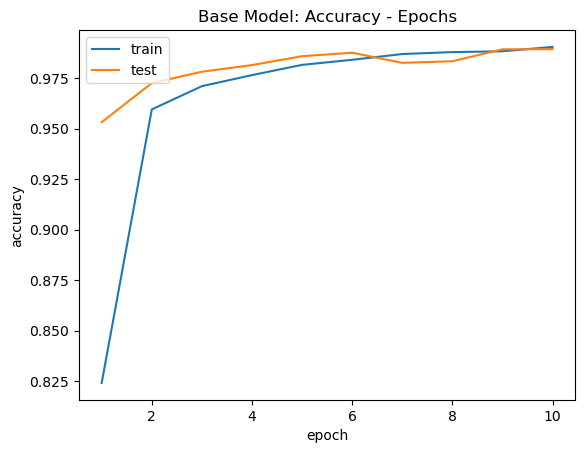

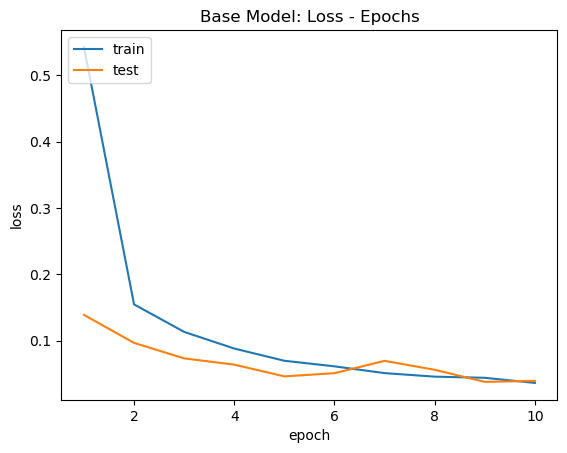

In [36]:
learning_curve(history,10)